<a href="https://colab.research.google.com/github/su763/type/blob/main/Anomaly_Detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anomaly Detection Data Mining Algorithms

Anomaly detection in data mining refers to the identification of patterns in a dataset that do not conform to expected behavior or usual patterns. These deviations, often referred to as outliers or anomalies, can be critical in various applications like fraud detection, network security, fault detection, and medical diagnosis.

Clustering-Based Methods:
•	LOF (Local Outlier Factor): Identifies anomalies by comparing the local density of a data point with that of its neighbors. If the point has a much lower density than its neighbors, it's an anomaly.
•	Outliers are those points that do not belong to any clus methods).

## 1. Isolation Forest Model
The Isolation Forest anomaly detection machine learning algorithm uses a tree-based approach to isolate anomalies after modeling itself on “normal” data in an unsupervised fashion. Like random forests, this algorithm initializes decision trees randomly and keeps splitting nodes into branches until all samples are at the leaves. Moreover, since anomalies tend to be different from the rest of the data, they are less likely to go deeper down the tree and grow in a distinct branch sooner than the rest. This isolation usually isolates the anomalies from the regular instances across all decision trees.

The Isolation Forest model can be found in the scikit-learn package in Python. In sklearn. ensemble, we have the IsolationForest() class. The parameters include n_estimators for the number of trees, max_samples to build trees on, and the vital contamination factor, which signifies the ratio of abnormal data in the training data.

## Steps:
Install necessary libraries (if you haven't already).
Generate synthetic data.
Fit the Isolation Forest model.
Make predictions and identify anomalies.

**Explanation:**

X_normal = 0.3 * rng.randn(100, 2)
'
rng.randn(100, 2): Generates a 2D array of shape (100, 2) with random numbers drawn from a standard normal distribution (mean = 0, standard deviation = 1).

0.3 * rng.randn(...): Scales the data by a factor of 0.3, reducing the spread of the points.

**X_normal = np.r_[X_normal + 2, X_normal - 2]**

X_normal + 2: Translates the entire dataset by adding 2 to each value, effectively shifting the data to a new cluster centered around (2, 2).
X_normal - 2: Translates the dataset in the opposite direction by subtracting 2 from each value, creating another cluster centered around (-2, -2).
np.r_[...]: Concatenates the two shifted datasets along the first axis (rows), forming a single dataset with 200 points (100 for each cluster).


**Local Density Deviation** is a concept often used in the context of data clustering, anomaly detection, and density-based analysis of datasets. It quantifies how much the density of data points around a given point deviates from the densities of its neighbors. This measure is particularly helpful in identifying points that differ significantly from their local surroundings, such as outliers or cluster boundaries.

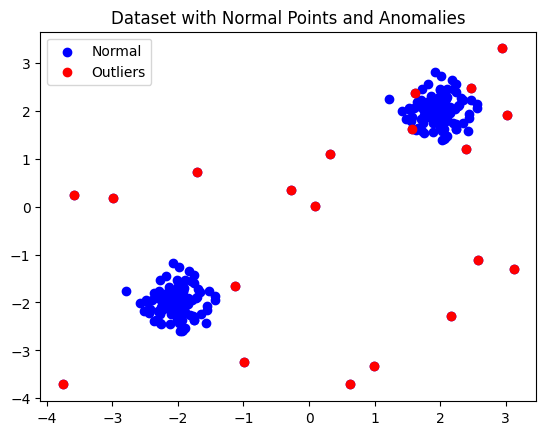

Anomalies detected:
     Feature1  Feature2  Prediction
37   1.214076  2.246571          -1
56   2.018069  2.738973          -1
89   1.920603  2.816051          -1
137 -2.785924 -1.753429          -1
189 -2.079397 -1.183949          -1
200  3.018985  1.926149          -1
202 -1.124071 -1.651265          -1
204  2.936579  3.305924          -1
205  0.090739  0.012130          -1
206  2.386361  1.199711          -1
208  3.120043 -1.296039          -1
209 -0.995336 -3.248144          -1
210  0.626241 -3.712462          -1
211 -0.275216  0.341157          -1
212 -1.707670  0.726666          -1
213 -3.755998 -3.701214          -1
214  2.580804 -1.118475          -1
215 -2.983516  0.177946          -1
216  2.159948 -2.273432          -1
217  0.983124 -3.317220          -1
218 -3.586546  0.250837          -1
219  0.325081  1.099439          -1


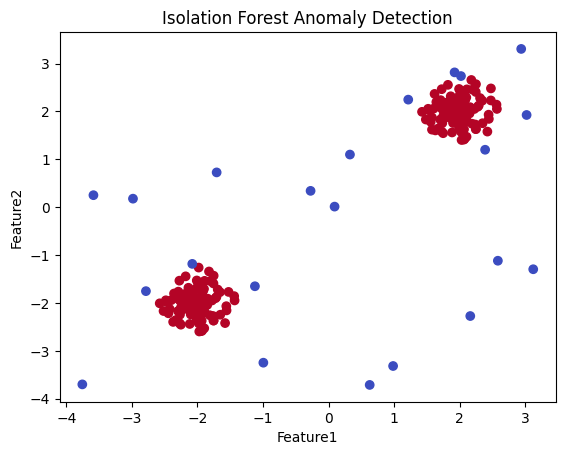

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Create synthetic dataset
# Generate normal data points
rng = np.random.RandomState(42)
X_normal = 0.3 * rng.randn(100, 2)
X_normal = np.r_[X_normal + 2, X_normal - 2]

# Generate anomalies
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Combine normal data with outliers
X = np.r_[X_normal, X_outliers]

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], color='b', label='Normal')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', label='Outliers')
plt.legend()
plt.title("Dataset with Normal Points and Anomalies")
plt.show()

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X)

# Predict anomalies (output will be -1 for anomalies, 1 for normal points)
predictions = model.predict(X)

# Add predictions to the dataset for analysis
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Prediction'] = predictions

# Print out some results
print("Anomalies detected:")
print(df[df['Prediction'] == -1])

# Visualize predictions
plt.scatter(df['Feature1'], df['Feature2'], c=df['Prediction'], cmap='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()



## Outlier detection with Local Outlier Factor (LOF)
The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. This example shows how to use LOF for outlier detection which is the default use case of this estimator in scikit-learn..

The number of neighbors considered (parameter n_neighbors) is typically set 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by samples that can potentially be local outliers. In practice, such information is generally not available, and taking n_neighbors=20 appears to work well in general.

In [ ]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

## Fit the model for outlier detection (default)
Use fit_predict to compute the predicted labels of the training samples (when LOF is used for outlier detection, the estimator has no predict, decision_function and score_samples methods).

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_


Explanation: The module legend_handler.HandlerPathCollection in Matplotlib is used to create custom legend handlers, specifically for handling collections of paths. This is often useful when dealing with complex plots where the default legend handling does not correctly represent the desired appearance of elements in the legend.
## Plot results

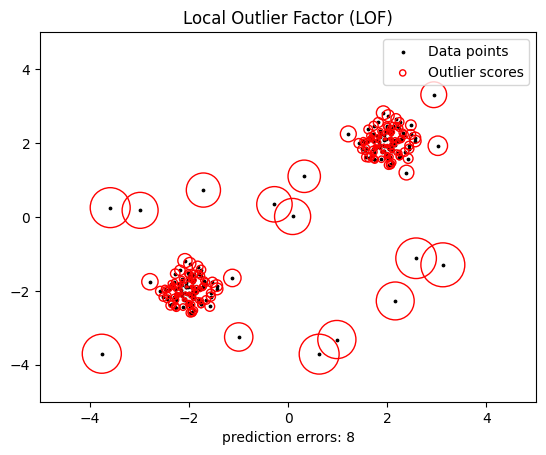

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()